# **Data Munging**

Before we can derive any meaningful insights from the Play Store data, it is essential to pre-process the data and make it suitable for further analysis. This pre-processing step forms a major part of data wrangling (or data munging) and ensures better quality data. It consists of the transformation and mapping of data from a "raw" data form into another format so that it is more valuable for a variety of downstream purposes such as analytics. Data analysts typically spend a sizeable amount of time in the process of data wrangling, compared to the actual analysis of the data.

After data munging is performed, several actionable insights can be derived from the Play Store apps data. Such insights could help to unlock the enormous potential to drive app-making businesses to success.

In [1]:
# Importing required packages
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
# Loading dataset
playstore_data = pd.read_csv('googleplaystore.csv')
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Data Cleaning

In [3]:
# Check whether there are any null values and figure out how you want to handle them?
# If there is any duplication of a record, how would you like to handle it?
# Hint: drop_duplicates
# Are there any non-English apps? And how to filter them?
# In the size column, multiply 10,000,000 with entries having M and multiply by 10,000 if we have K in the cell.

playstore_data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [4]:
playstore_data.dropna(inplace=True)

In [5]:
# identify the duplicate apps
len(set(playstore_data['App'].values)), playstore_data.shape

(8190, (9360, 13))

In [6]:
# Remove the duplicate apps
playstore_data = playstore_data.drop_duplicates(['App'], keep='first')
playstore_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [7]:
# Check for any null values
playstore_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [8]:
# Check datatype of each column
playstore_data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [9]:
# Find the Non-English Apps

def is_English(string):
    spl_count = 0
    for character in string:
        if ord(character) > 127:
          spl_count += 1
    if spl_count > len(string) // 2:
      return False
    return True

In [10]:
playstore_data[~playstore_data['App'].apply(is_English)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
710,Flame - درب عقلك يوميا,EDUCATION,4.6,56065,37M,"1,000,000+",Free,0,Everyone,Education,"July 26, 2018",3.3,4.1 and up
3750,РИА Новости,NEWS_AND_MAGAZINES,4.5,44274,8.0M,"1,000,000+",Free,0,Everyone,News & Magazines,"August 6, 2018",4.0.6,4.4 and up
4193,صور حرف H,ART_AND_DESIGN,4.4,13,4.5M,"1,000+",Free,0,Everyone,Art & Design,"March 27, 2018",2.0,4.0.3 and up
5698,日本AV历史,BOOKS_AND_REFERENCE,4.1,215,30M,"10,000+",Free,0,Teen,Books & Reference,"March 6, 2018",1.2,4.0 and up
6406,BL 女性向け恋愛ゲーム◆俺プリクロス,FAMILY,4.2,3379,62M,"100,000+",Free,0,Mature 17+,Simulation,"March 23, 2017",1.6.3,2.3.3 and up
6417,BL 女性向け恋愛ゲーム◆ごくメン,FAMILY,4.2,1901,8.2M,"100,000+",Free,0,Mature 17+,Simulation,"July 7, 2016",1.3.0,2.3.3 and up
6418,あなカレ【BL】無料ゲーム,FAMILY,4.7,6073,8.5M,"100,000+",Free,0,Mature 17+,Simulation,"February 25, 2018",4.2.2,2.3 and up
6420,감성학원 BL 첫사랑,COMICS,4.4,190,34M,"10,000+",Free,0,Everyone,Comics,"November 17, 2017",3.2.1,3.0 and up
6629,BQ-መጽሐፍ ቅዱሳዊ ጥያቄዎች,GAME,4.7,191,7.2M,"5,000+",Free,0,Everyone,Trivia,"July 31, 2018",4.1.2,4.1 and up
9117,لعبة تقدر تربح DZ,FAMILY,4.2,238,6.8M,"10,000+",Free,0,Everyone,Education,"November 18, 2016",6.0.0.0,4.1 and up


In [11]:
# Filter the Non English Apps

playstore_data = playstore_data[playstore_data['App'].apply(is_English)]
playstore_data.shape

(8175, 13)

In [12]:
playstore_data.Size.value_counts()

Size
Varies with device    1169
14M                    147
12M                    146
13M                    143
11M                    143
                      ... 
861k                     1
467k                     1
676k                     1
582k                     1
619k                     1
Name: count, Length: 412, dtype: int64

In [13]:
playstore_data['Size'] = playstore_data['Size'].apply(lambda x: str(x).replace('Varies with device','NaN') if 'Varies with device' in x else x)
playstore_data['Size'] = playstore_data['Size'].apply(lambda x: float(str(x).rstrip('M'))*(10**6) if 'M' in str(x) else x)
playstore_data['Size'] = playstore_data['Size'].apply(lambda x: float(str(x).rstrip('k'))*(10**3) if 'k' in str(x) else x)
playstore_data = playstore_data[~(playstore_data['Size'] == 'NaN')]
playstore_data['Size'] = playstore_data['Size'].astype(float)

C:\Users\yash2\AppData\Local\Temp\ipykernel_34004\3405458361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstore_data['Size'] = playstore_data['Size'].apply(lambda x: str(x).replace('Varies with device','NaN') if 'Varies with device' in x else x)
C:\Users\yash2\AppData\Local\Temp\ipykernel_34004\3405458361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstore_data['Size'] = playstore_data['Size'].apply(lambda x: float(str(x).rstrip('M'))*(10**6) if 'M' in str(x) else x)
C:\Users\yash2\AppD

## Visualisation 

In [14]:
# Find the number of apps in various categories by using an appropriate plot.

playstore_data['Category'].nunique()

33

In [15]:
counts_of_Apps = playstore_data['Category'].value_counts()
counts_of_Apps

Category
FAMILY                 1504
GAME                    831
TOOLS                   625
PERSONALIZATION         274
LIFESTYLE               268
MEDICAL                 266
FINANCE                 258
PRODUCTIVITY            223
BUSINESS                222
SPORTS                  221
PHOTOGRAPHY             204
HEALTH_AND_FITNESS      191
COMMUNICATION           188
SOCIAL                  156
NEWS_AND_MAGAZINES      152
SHOPPING                146
TRAVEL_AND_LOCAL        141
BOOKS_AND_REFERENCE     140
DATING                  122
VIDEO_PLAYERS           112
MAPS_AND_NAVIGATION      94
EDUCATION                87
FOOD_AND_DRINK           72
ENTERTAINMENT            64
AUTO_AND_VEHICLES        63
LIBRARIES_AND_DEMO       60
ART_AND_DESIGN           57
WEATHER                  50
HOUSE_AND_HOME           50
COMICS                   46
PARENTING                44
EVENTS                   38
BEAUTY                   37
Name: count, dtype: int64

In [16]:
counts_of_Apps.index.values

array(['FAMILY', 'GAME', 'TOOLS', 'PERSONALIZATION', 'LIFESTYLE',
       'MEDICAL', 'FINANCE', 'PRODUCTIVITY', 'BUSINESS', 'SPORTS',
       'PHOTOGRAPHY', 'HEALTH_AND_FITNESS', 'COMMUNICATION', 'SOCIAL',
       'NEWS_AND_MAGAZINES', 'SHOPPING', 'TRAVEL_AND_LOCAL',
       'BOOKS_AND_REFERENCE', 'DATING', 'VIDEO_PLAYERS',
       'MAPS_AND_NAVIGATION', 'EDUCATION', 'FOOD_AND_DRINK',
       'ENTERTAINMENT', 'AUTO_AND_VEHICLES', 'LIBRARIES_AND_DEMO',
       'ART_AND_DESIGN', 'WEATHER', 'HOUSE_AND_HOME', 'COMICS',
       'PARENTING', 'EVENTS', 'BEAUTY'], dtype=object)

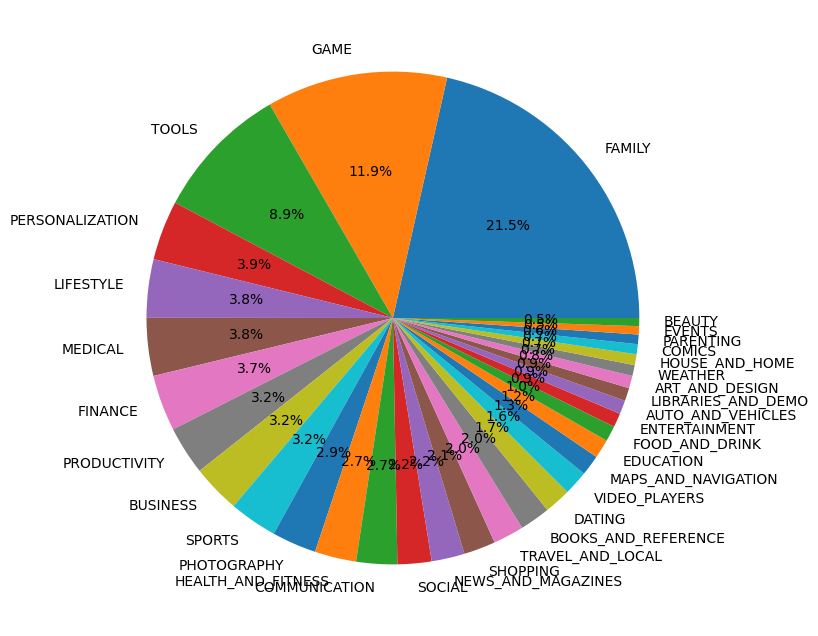

In [17]:
plt.figure(figsize=(10, 8))
plt.pie(counts_of_Apps, labels = counts_of_Apps.index.values, autopct='%1.1f%%')
plt.show()

In [18]:
# Explore the distribution of free and paid apps across different categories
# Identify the free and paid apps

free_apps = playstore_data[playstore_data.Type == 'Free']
paid_apps = playstore_data[playstore_data.Type == 'Paid']
free_apps.shape, paid_apps.shape

((6468, 13), (538, 13))

In [19]:
paid_categories = paid_apps['Category'].value_counts()
free_categories = free_apps['Category'].value_counts()
paid_categories

Category
FAMILY                 142
GAME                    74
PERSONALIZATION         61
TOOLS                   55
MEDICAL                 54
SPORTS                  20
COMMUNICATION           18
LIFESTYLE               16
PRODUCTIVITY            14
FINANCE                 13
PHOTOGRAPHY             13
HEALTH_AND_FITNESS       8
BUSINESS                 8
BOOKS_AND_REFERENCE      7
WEATHER                  6
TRAVEL_AND_LOCAL         6
MAPS_AND_NAVIGATION      4
EDUCATION                4
ART_AND_DESIGN           3
SHOPPING                 2
SOCIAL                   2
DATING                   2
NEWS_AND_MAGAZINES       2
FOOD_AND_DRINK           1
ENTERTAINMENT            1
PARENTING                1
VIDEO_PLAYERS            1
Name: count, dtype: int64

In [20]:
len(free_categories), len(paid_categories)

(33, 27)

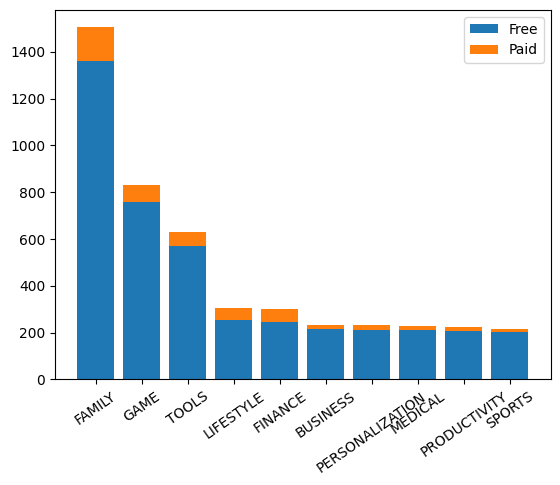

In [21]:
# Bar Chart showing Distribution of Free and Paid apps category wise
N = 10

idx = np.arange(N)

p1 = plt.bar(idx, free_categories.values[:10])
p2 = plt.bar(idx , paid_categories.values[:10], bottom= free_categories.values[:10])

plt.xticks(idx, free_categories.index[:10], rotation=35)
plt.legend((p1[0], p2[0]),('Free', 'Paid'))
plt.show()

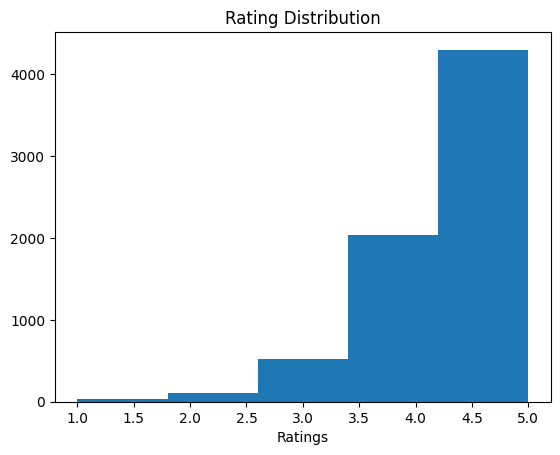

In [22]:
# Represent the distribution of app rating on a scale of 1-5 using histogram

ratings = playstore_data['Rating']

plt.hist(ratings, bins=5)
plt.title('Rating Distribution')
plt.xlabel('Ratings')
plt.show()

<Axes: xlabel='Rating'>

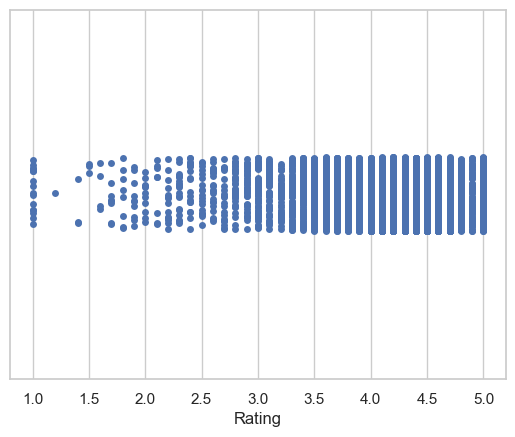

In [23]:
# or using stripplot

sns.set_theme(style='whitegrid')
sns.stripplot(data=ratings, jitter=True, orient='h')

In [24]:
# Identify outliers of the rating column by plotting the boxplot category wise and handle them

df_categories = playstore_data.groupby('Category').filter(lambda x: len(x) >= 120)
df_categories

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
140,E-Book Read - Read Book for free,BOOKS_AND_REFERENCE,4.5,1857,4900000.0,"50,000+",Free,0,Everyone,Books & Reference,"August 3, 2018",1.3.2,4.4 and up
141,Download free book with green book,BOOKS_AND_REFERENCE,4.6,4478,9500000.0,"100,000+",Free,0,Everyone 10+,Books & Reference,"July 31, 2017",1.1,4.0 and up
147,Free Panda Radio Music,BOOKS_AND_REFERENCE,4.5,418,4200000.0,"100,000+",Free,0,Everyone,Books & Reference,"March 27, 2018",2.1,4.1 and up
148,Book store,BOOKS_AND_REFERENCE,4.4,22486,5400000.0,"1,000,000+",Free,0,Teen,Books & Reference,"June 6, 2018",3.2.1,4.0 and up
150,English Grammar Complete Handbook,BOOKS_AND_REFERENCE,4.6,1435,2800000.0,"500,000+",Free,0,Everyone,Books & Reference,"January 21, 2018",1.0,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619000.0,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2600000.0,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


Text(0, 0.5, 'Ratings')

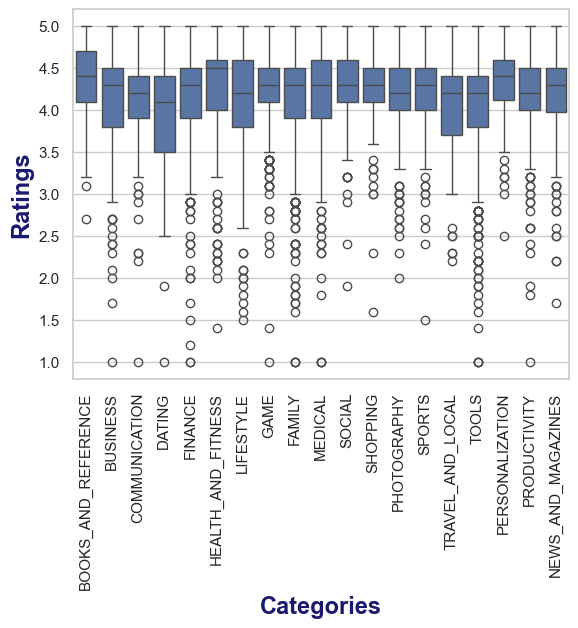

In [25]:
sns.boxplot(y=df_categories.Rating, x=df_categories.Category, data=playstore_data)
plt.xticks(rotation=90)
plt.xlabel('Categories',fontsize=17, fontweight='bold', color='#191970', )
plt.ylabel('Ratings', fontsize=17, fontweight='bold', color='#191970')

In [26]:
def remove_outliers(data):
    data_mean, data_std = data.mean(), data.std()
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outliers_removed = [x if x > lower and x < upper else data_mean for x in data ]
    return outliers_removed

In [27]:
playstore_data['Rating'] = remove_outliers(playstore_data['Rating'])
playstore_data['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10833    4.8
10834    4.0
10836    4.5
10837    5.0
10840    4.5
Name: Rating, Length: 7006, dtype: float64

Text(0, 0.5, 'Ratings')

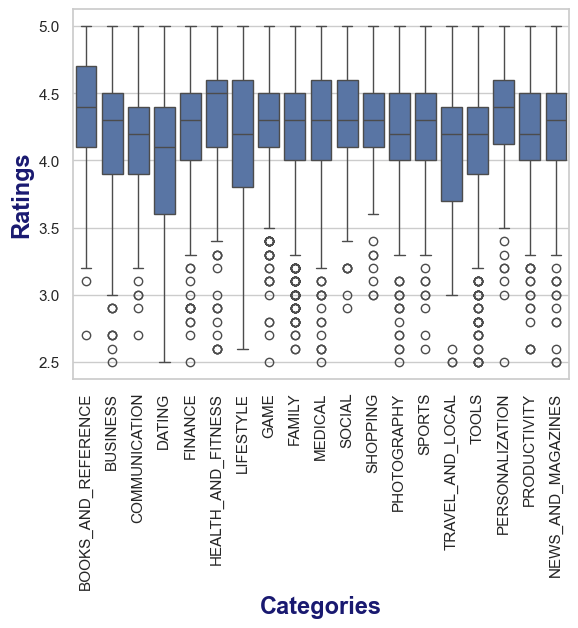

In [28]:
df_categories = playstore_data.groupby('Category').filter(lambda x: len(x) >= 120)

sns.boxplot(y=df_categories.Rating, x=df_categories.Category,data=playstore_data);
plt.xticks(rotation=90)
plt.xlabel('Categories',fontsize=17, fontweight='bold', color='#191970', )
plt.ylabel('Ratings', fontsize=17, fontweight='bold', color='#191970')

In [29]:
# Plot the barplot of all the categories indicating no. of installs

playstore_data['Installs'] = playstore_data['Installs'].str.rstrip('+').str.replace(',','')
playstore_data['Installs'] = playstore_data['Installs'].astype(int)

In [33]:
temp_df = playstore_data.groupby(['Category']).agg({'Installs':'sum'}).sort_values(by='Installs',ascending=False).reset_index()
temp_df

,Category,Installs
0,GAME,11532347717
1,FAMILY,3552200580
2,TOOLS,2879553500
3,COMMUNICATION,1817915530
4,PHOTOGRAPHY,1493893130
5,PRODUCTIVITY,1296302080
6,NEWS_AND_MAGAZINES,1189895550
7,PERSONALIZATION,895131930
8,VIDEO_PLAYERS,866662200
9,SPORTS,806311465


Text(0, 0.5, 'Categories')

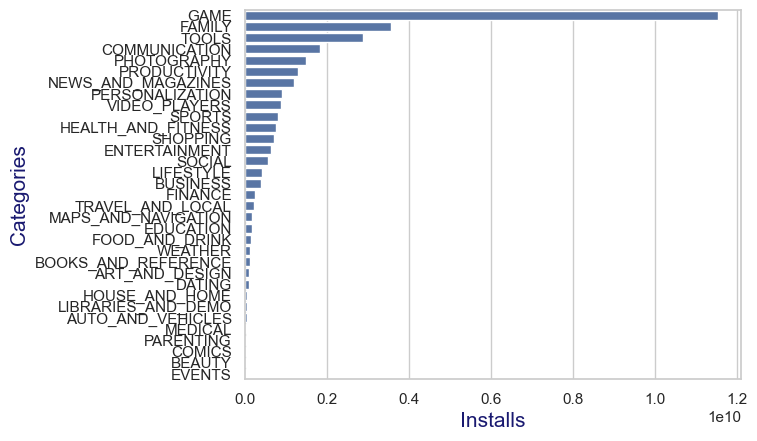

In [34]:
sns.barplot(x=temp_df['Installs'], y=temp_df['Category'] )

plt.yticks(rotation=0)
plt.xlabel('Installs', fontsize=15, color='#191970')
plt.ylabel('Categories', fontsize=15, color='#191970')

## Insights

In [39]:
# Does the price correlate with the size of the app?

playstore_data['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [ ]:
playstore_data['Price'] = playstore_data['Price'].str.lstrip('$')
playstore_data['Price'] = playstore_data['Price'].astype(float)

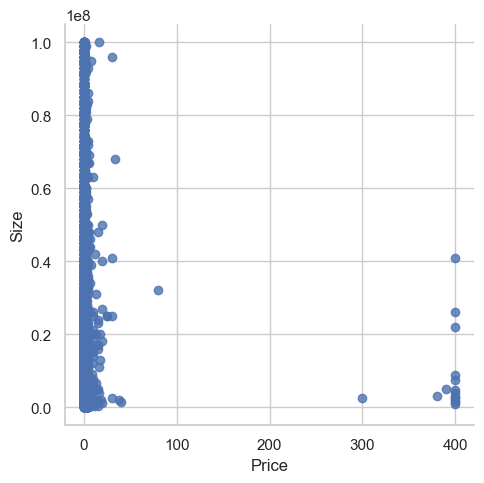

In [43]:
sns.lmplot(x='Price', y='Size', data=playstore_data, fit_reg=False)

Conclusion: No particular pattern, inceasing or decreasing

Price does not depend on size of the App

In [48]:
# Find the popular app categories based on rating and no. of installs

popular_categories = playstore_data.groupby(['Category']).agg({'Installs':'sum','Rating':'sum'}).sort_values(by='Rating',ascending=False).reset_index()
popular_categories.head()

,Category,Installs,Rating
0,FAMILY,3552200580,6330.706965
1,GAME,11532347717,3528.941393
2,TOOLS,2879553500,2549.506965
3,PERSONALIZATION,895131930,1184.900000
4,MEDICAL,31550176,1128.443134


In [50]:
# How many apps are produced in each year category-wise ?

playstore_data['Year'] = playstore_data['Last Updated'].str[-4:]

playstore_data['Year'].unique()

array(['2018', '2017', '2014', '2016', '2015', '2013', '2012', '2011',
       '2010'], dtype=object)

<Axes: title={'center': 'Downloads in 2018'}, xlabel='Category', ylabel='count'>

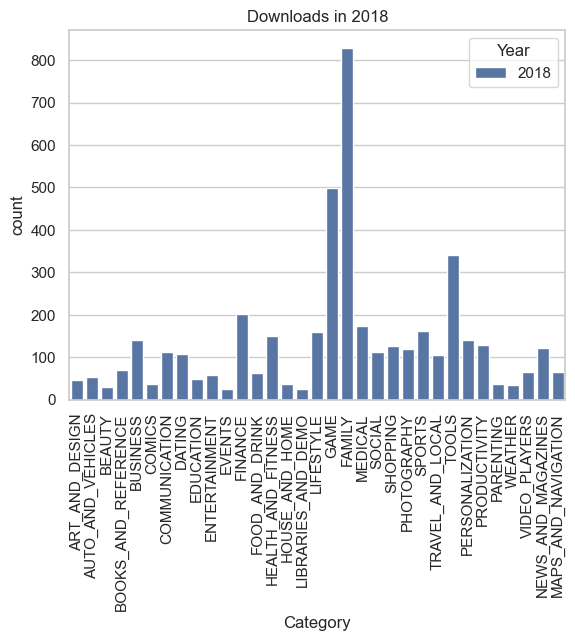

In [51]:
App2018 = playstore_data[playstore_data['Year']=='2018']

plt.title('Downloads in 2018')
plt.xticks(rotation = 'vertical')
sns.countplot(hue = 'Year', x = 'Category', data = App2018)

<Axes: title={'center': 'Downloads in 2017'}, xlabel='Category', ylabel='count'>

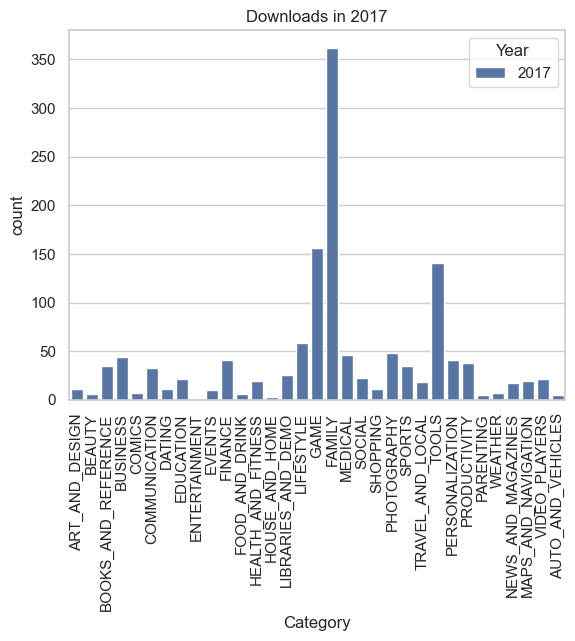

In [52]:
App2017 = playstore_data[playstore_data['Year']=='2017']

plt.title('Downloads in 2017')
plt.xticks(rotation = 'vertical')
sns.countplot(hue = 'Year', x = 'Category', data = App2017)

In [ ]:
# Identify the highest paid apps with a good rating